
# Chapter 0 -> Spark ETL with files (CSV | JSON | Parquet | Text | Spark Dataframe)

Task to do 
1. Read CSV file and write into dataframe
2. Read JSON file and write into dataframe 
3. Read Parquet file and write into dataframe
4. Read text file and write into dataframe
5. Create temp table for all 
6. Create JSON file from CSV dataframe
7. Create CSV file from Parquet dataframe
8. Create parquet file from JSON dataframe

Reference:
https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

In [1]:
# First Load all the required library and also Start Spark Session
# Load all the required library
from pyspark.sql import SparkSession

In [2]:
#Start Spark Session
spark = SparkSession.builder.appName("chapter0").getOrCreate()
sqlContext = SparkSession(spark)
#Dont Show warning only error
spark.sparkContext.setLogLevel("ERROR")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/02/28 22:40:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


1. Read CSV file and create dataframe
We have data in CSV file in below format

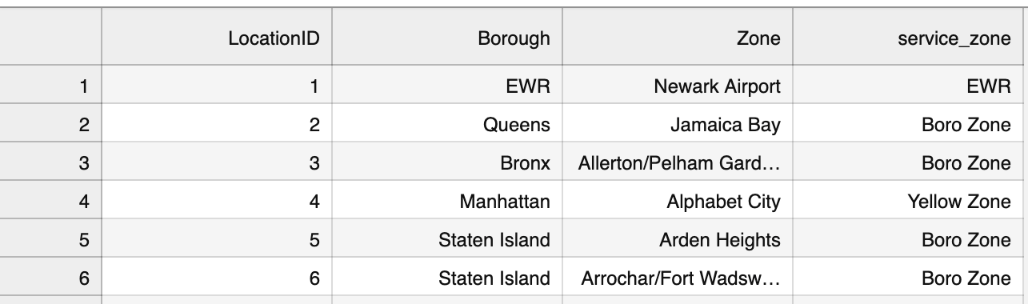


In [8]:
#Load CSV file into DataFrame
csvdf = spark.read.format("csv").option("header","true").option("inferSchema","true").load("nyc_taxi_zone.csv")

In [9]:
#Checking dataframe schema
csvdf.printSchema()

root
 |-- LocationID: integer (nullable = true)
 |-- Borough: string (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [10]:
csvdf.show(n=10)

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
+----------+-------------+--------------------+------------+
only showing top 10 rows



2. Read JSON file and create dataframe 

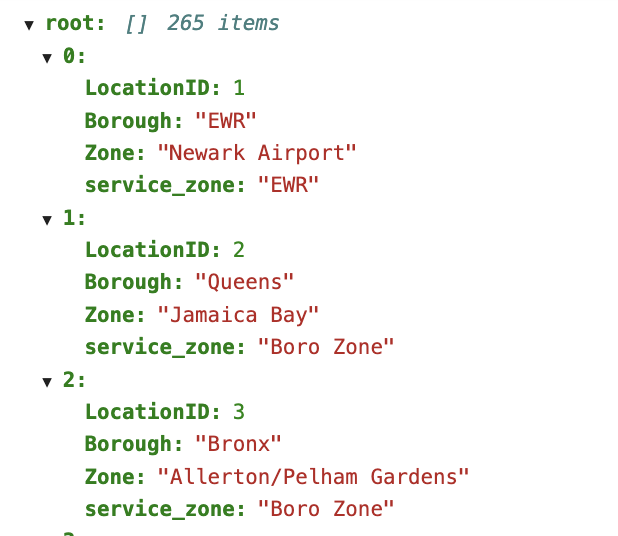


In [12]:
#Load Json file into DataFrame
jsondf = spark.read.format("json").option("multiline","true").load("nyc_taxi_zone.json")

In [13]:
jsondf.printSchema()

root
 |-- Borough: string (nullable = true)
 |-- LocationID: long (nullable = true)
 |-- Zone: string (nullable = true)
 |-- service_zone: string (nullable = true)



In [15]:
jsondf.show(n=10)

+-------------+----------+--------------------+------------+
|      Borough|LocationID|                Zone|service_zone|
+-------------+----------+--------------------+------------+
|          EWR|         1|      Newark Airport|         EWR|
|       Queens|         2|         Jamaica Bay|   Boro Zone|
|        Bronx|         3|Allerton/Pelham G...|   Boro Zone|
|    Manhattan|         4|       Alphabet City| Yellow Zone|
|Staten Island|         5|       Arden Heights|   Boro Zone|
|Staten Island|         6|Arrochar/Fort Wad...|   Boro Zone|
|       Queens|         7|             Astoria|   Boro Zone|
|       Queens|         8|        Astoria Park|   Boro Zone|
|       Queens|         9|          Auburndale|   Boro Zone|
|       Queens|        10|        Baisley Park|   Boro Zone|
+-------------+----------+--------------------+------------+
only showing top 10 rows



3. Read Parquet file and write into dataframe

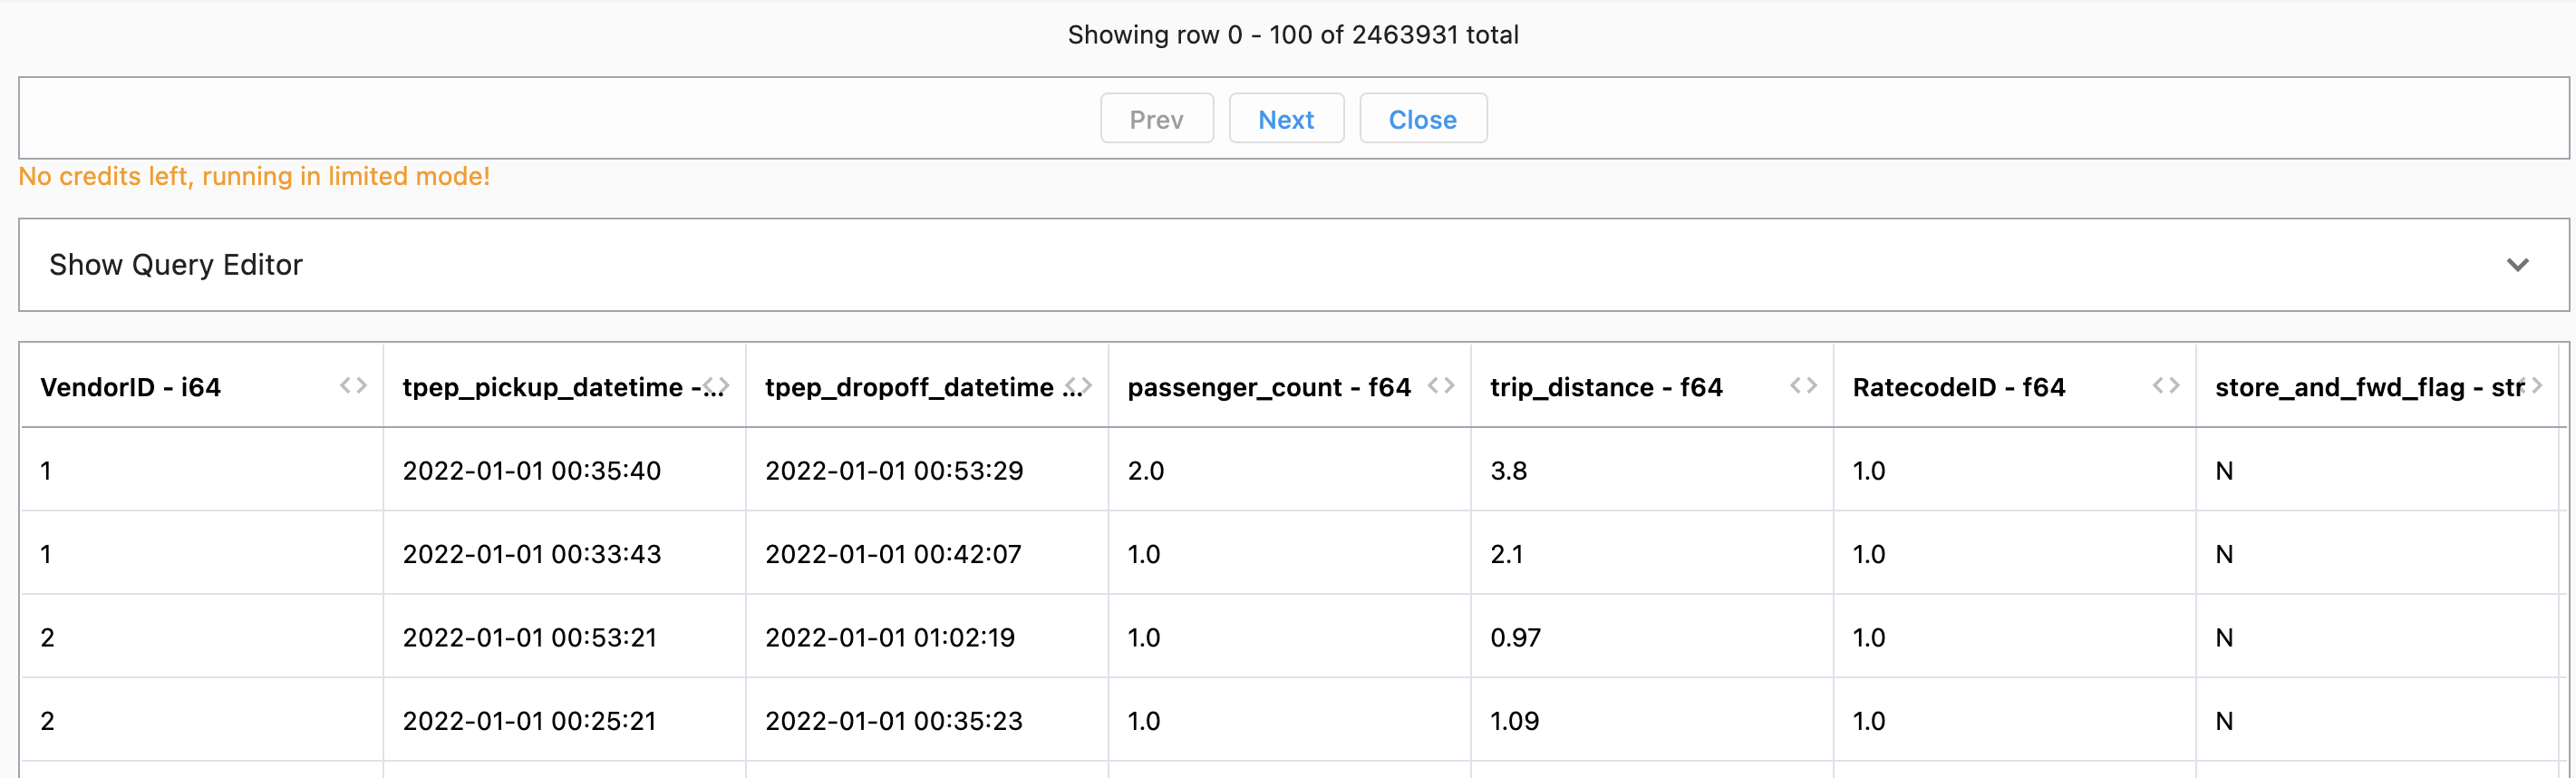

In [16]:
parquetdf = spark.read.format("parquet").load("yellow_tripdata_2022-01.parquet")

In [17]:
parquetdf.printSchema()

root
 |-- VendorID: long (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: double (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: double (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: long (nullable = true)
 |-- DOLocationID: long (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- airport_fee: double (nullable = true)



In [19]:
parquetdf.count()

2463931

4. Read text file and write into dataframe
Text file 

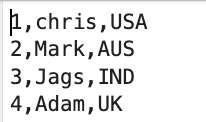

In [20]:
txtdf = spark.read.text("sample.txt")

In [21]:
txtdf.show()

+-----------+
|      value|
+-----------+
|1,chris,USA|
| 2,Mark,AUS|
| 3,Jags,IND|
|  4,Adam,UK|
+-----------+



In [22]:
txtdf = spark.read.option("lineSep", ",").text("sample.txt")

In [23]:
txtdf.show()

+------+
| value|
+------+
|     1|
| chris|
|USA\n2|
|  Mark|
|AUS\n3|
|  Jags|
|IND\n4|
|  Adam|
|    UK|
+------+



5. Create temp table for all 

In [24]:
csvdf.createOrReplaceTempView("tempCSV")
jsondf.createOrReplaceTempView("tempJSON")
parquetdf.createOrReplaceTempView("tempParquet")
txtdf.createOrReplaceTempView("tempTXT")

In [25]:
sqlContext.sql("SELECT * FROM tempCSV LIMIT 10").show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
+----------+-------------+--------------------+------------+



In [26]:
sqlContext.sql("SELECT * FROM tempJSON LIMIT 10").show()

+-------------+----------+--------------------+------------+
|      Borough|LocationID|                Zone|service_zone|
+-------------+----------+--------------------+------------+
|          EWR|         1|      Newark Airport|         EWR|
|       Queens|         2|         Jamaica Bay|   Boro Zone|
|        Bronx|         3|Allerton/Pelham G...|   Boro Zone|
|    Manhattan|         4|       Alphabet City| Yellow Zone|
|Staten Island|         5|       Arden Heights|   Boro Zone|
|Staten Island|         6|Arrochar/Fort Wad...|   Boro Zone|
|       Queens|         7|             Astoria|   Boro Zone|
|       Queens|         8|        Astoria Park|   Boro Zone|
|       Queens|         9|          Auburndale|   Boro Zone|
|       Queens|        10|        Baisley Park|   Boro Zone|
+-------------+----------+--------------------+------------+



In [29]:
sqlContext.sql("SELECT count(*) as count FROM tempParquet").show()

+-------+
|  count|
+-------+
|2463931|
+-------+



6. Create JSON file from CSV dataframe

Save Options
- append
- overwrite
- ignore

In [36]:
csvdf.write.format("json").save("jsondata",mode='append')

7. Create CSV file from Parquet dataframe

In [38]:
parquetdf.write.format("csv").option("header","true").save("csvdata",mode='append')

8. Create parquet file from JSON dataframe

In [40]:
jsondf.write.format("parquet").option("compression","snappy").save("parquetdata",mode='append')